In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import datetime
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data
df = pd.read_csv(r'C:\Users\I539797\Documents\Thesis\Datasets\Formatted Datasets\formatted_saopaulo.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
df.head()

,NumericIndex,OriginMovementID,DestinationMovementID,MeanTravelTimeSeconds,RangeLowerBoundTravelTimeSeconds,RangeUpperBoundTravelTimeSeconds,DayOfWeek
Date,,,,,,,
2016-01-02,502791,5,318,964,814,1141,Saturday
2016-01-02,502761,5,77,563,398,794,Saturday
2016-01-02,502760,5,64,741,583,940,Saturday
2016-01-02,502759,5,63,661,468,932,Saturday
2016-01-02,502758,5,62,595,393,899,Saturday


In [4]:
df = pd.DataFrame(df.groupby('Date')['MeanTravelTimeSeconds'].mean())
df.head()

,MeanTravelTimeSeconds
Date,
2016-01-02,744.509434
2016-01-03,899.809524
2016-01-04,905.813559
2016-01-05,909.786885
2016-01-06,929.409449


In [5]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))

In [6]:
start_date = datetime(2016,1,2)
end_date = datetime(2020,3,31)
lim_df = df[start_date:end_date]

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


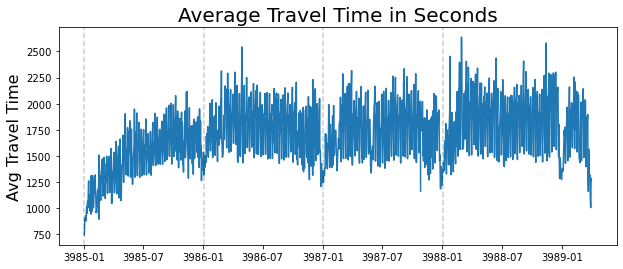

In [7]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Average Travel Time in Seconds', fontsize=20)
plt.ylabel('Avg Travel Time', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [8]:
first_diff = lim_df.diff()[1:]

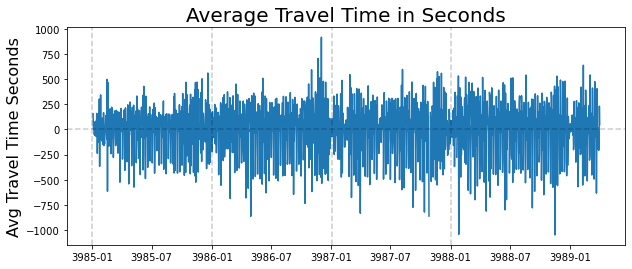

In [9]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Average Travel Time in Seconds', fontsize=20)
plt.ylabel('Avg Travel Time Seconds', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

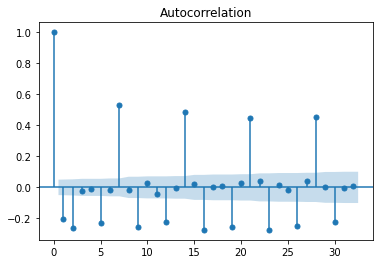

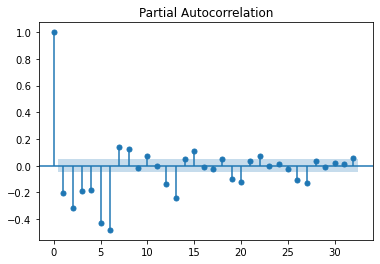

In [10]:
# ACF and PACF
plot_acf(first_diff.dropna())
plot_pacf(first_diff.dropna())
plt.show()

# acf_vals = acf(first_diff)
# num_lags = 22
# plt.bar(range(num_lags), acf_vals[:num_lags])

In [11]:
train_end = datetime(2019,11,30)
test_end = datetime(2019,12,31)

train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]

In [32]:
my_order = (1,1,1)
my_seasonal_order = (1, 0, 1, 7)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

ValueError: Invalid model: moving average lag(s) {7} are in both the seasonal and non-seasonal moving average components.

In [ ]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

In [ ]:
#summary of the model
print(model_fit.summary())

In [ ]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
plt.plot(residuals)
# ax.set_xlim(datetime.date(int(2016),int(1),int(2)), datetime.date(int(2019),int(12),int(31)))
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(lim_df)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [18]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 2019-12-01 00:00:00     NaN
2019-12-02 00:00:00     NaN
2019-12-03 00:00:00     NaN
2019-12-04 00:00:00     NaN
2019-12-05 00:00:00     NaN
2019-12-06 00:00:00     NaN
2019-12-07 00:00:00     NaN
2019-12-08 00:00:00     NaN
2019-12-09 00:00:00     NaN
2019-12-10 00:00:00     NaN
2019-12-11 00:00:00     NaN
2019-12-12 00:00:00     NaN
2019-12-13 00:00:00     NaN
2019-12-14 00:00:00     NaN
2019-12-15 00:00:00     NaN
2019-12-16 00:00:00     NaN
2019-12-17 00:00:00     NaN
2019-12-18 00:00:00     NaN
2019-12-19 00:00:00     NaN
2019-12-20 00:00:00     NaN
2019-12-21 00:00:00     NaN
2019-12-22 00:00:00     NaN
2019-12-23 00:00:00     NaN
2019-12-24 00:00:00     NaN
2019-12-25 00:00:00     NaN
2019-12-26 00:00:00     NaN
2019-12-27 00:00:00     NaN
2019-12-28 00:00:00     NaN
2019-12-29 00:00:00     NaN
2019-12-30 00:00:00     NaN
2019-12-31 00:00:00     NaN
MeanTravelTimeSeconds   NaN
dtype: float64
